## Regularized Linear Models

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")
sns.set()

### Ridge Regression 
<br>
Cost function:
$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^n\theta^2_i$
<br>
<br>
Closed-form solution: $\theta = (X^T \cdot X + \alpha A)^{-1} \cdot X^T \cdot y$

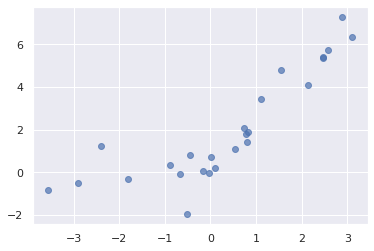

In [2]:
m = 25
X = 2 * np.random.randn(m, 1)
y =  0.25 * X**2 + X + 1 + np.random.randn(m, 1)
plt.scatter(X, y, alpha=0.7)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly10 = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly10.fit_transform(X)
X[0], X_poly[0]

(array([3.10176252]),
 array([3.10176252e+00, 9.62093075e+00, 2.98418424e+01, 9.25623084e+01,
        2.87106299e+02, 8.90535559e+02, 2.76222982e+03, 8.56778094e+03,
        2.65752218e+04, 8.24300271e+04]))

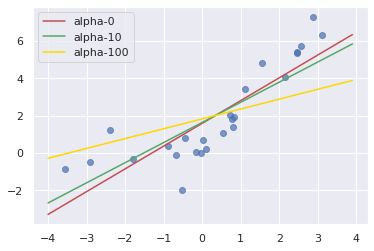

In [4]:
from sklearn.linear_model import Ridge

alphas = [0, 10, 100]
predictions = []
X_pred = np.arange(-4, 4, 0.1).reshape(-1, 1)

for alpha in alphas:
    ridge = Ridge(alpha=alpha, solver='cholesky')
    ridge.fit(X, y)
    y_pred = ridge.predict(X_pred)
    predictions.append(y_pred)

plt.scatter(X, y, alpha=0.7)
plt.plot(X_pred, predictions[0], 'r', label='alpha-0')
plt.plot(X_pred, predictions[1], 'g', label='alpha-10')
plt.plot(X_pred, predictions[2], 'gold', label='alpha-100')
plt.legend()


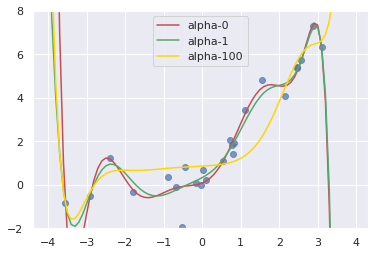

In [5]:
alphas = [0, 1, 100]
predictions = []
X_pred = np.arange(-4, 4, 0.1).reshape(-1, 1)
X_pred_10 = poly10.fit_transform(X_pred)

for alpha in alphas:
    ridge = Ridge(alpha=alpha, solver='cholesky')
    ridge.fit(X_poly, y)
    y_pred = ridge.predict(X_pred_10)
    predictions.append(y_pred)

plt.scatter(X, y, alpha=0.7)
plt.plot(X_pred, predictions[0], 'r', label='alpha-0')
plt.plot(X_pred, predictions[1], 'g', label='alpha-1')
plt.plot(X_pred, predictions[2], 'gold', label='alpha-100')
plt.ylim(-2, 8)
plt.legend()

In [6]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.3320719])

### Lasso Regression 
<br>
Cost function:
$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n |\theta_i|$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.350540828034923, tolerance: 0.015635906062953273
  positive)


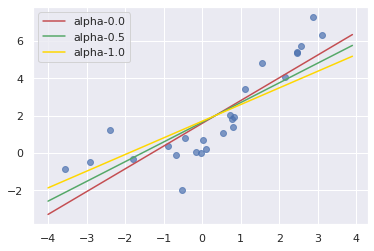

In [7]:
from sklearn.linear_model import Lasso

alphas = [0, 0.5, 1]
predictions = []
X_pred = np.arange(-4, 4, 0.1).reshape(-1, 1)

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    y_pred = lasso.predict(X_pred)
    predictions.append(y_pred)

plt.scatter(X, y, alpha=0.7)
plt.plot(X_pred, predictions[0], 'r', label='alpha-0.0')
plt.plot(X_pred, predictions[1], 'g', label='alpha-0.5')
plt.plot(X_pred, predictions[2], 'gold', label='alpha-1.0')
plt.legend()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.818868635358255, tolerance: 0.015635906062953273
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.129346442659891, tolerance: 0.015635906062953273
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_desc

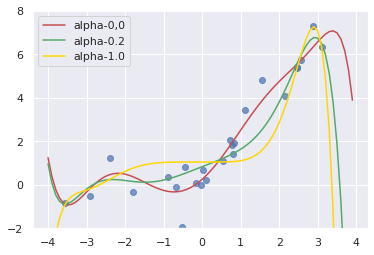

In [8]:
alphas = [0, 0.25, 1]
predictions = []
X_pred = np.arange(-4, 4, 0.1).reshape(-1, 1)
X_pred_10 = poly10.fit_transform(X_pred)

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_poly, y)
    y_pred = lasso.predict(X_pred_10)
    predictions.append(y_pred)

plt.scatter(X, y, alpha=0.7)
plt.plot(X_pred, predictions[0], 'r', label='alpha-0,0')
plt.plot(X_pred, predictions[1], 'g', label='alpha-0.2')
plt.plot(X_pred, predictions[2], 'gold', label='alpha-1.0')
plt.ylim(-2, 8)
plt.legend()

## Elastic Net

$J(\theta) = MSE(\theta) + r \alpha \sum_{i=1}^n |\theta| + \frac{1-r}{2} \alpha \sum_{i=1}^n \theta_i^2$

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.286751842115448, tolerance: 0.015635906062953273
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.04216343854536, tolerance: 0.015635906062953273
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.66414479103776, tolerance: 0.015635906062953273
  positive)


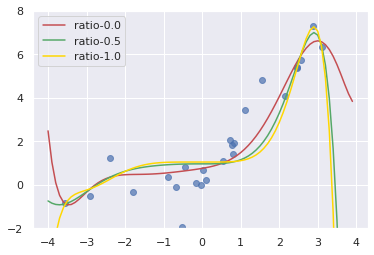

In [9]:
from sklearn.linear_model import ElasticNet

alpha = 1
ratios = [0, 0.5, 1] 

predictions = []
X_pred = np.arange(-4, 4, 0.1).reshape(-1, 1)
X_pred_10 = poly10.fit_transform(X_pred)

for r in ratios:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=r)
    elastic_net.fit(X_poly, y)
    y_pred = elastic_net.predict(X_pred_10)
    predictions.append(y_pred)

plt.scatter(X, y, alpha=0.7)
plt.plot(X_pred, predictions[0], 'r', label='ratio-0.0')
plt.plot(X_pred, predictions[1], 'g', label='ratio-0.5')
plt.plot(X_pred, predictions[2], 'gold', label='ratio-1.0')
plt.ylim(-2, 8)
plt.legend()

### Early Stopping

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

standard_scaler = StandardScaler()

In [0]:
X_scaled = standard_scaler.fit_transform(X_poly)
X_scaled

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.5)    

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train, y_train)
    y_val_predict = sgd_reg.predict(X_train)
    val_error = mean_squared_error(y_val_predict, y_train)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)


print('Best model:', best_model)
print('The smallest val error:', minimum_val_error)
print('Best epoch:', best_epoch)

Best model: SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=True)
The smallest val error: 0.36356306250285503
Best epoch: 999


Best epoch for train set: 1000
RMSE for best epoch in train set: 0.6029686373249125
--------------------------------------------------
Best epoch for test set: 220
RMSE for best epoch in test set: 0.7516742299755237


Text(0, 0.5, 'RMSE')

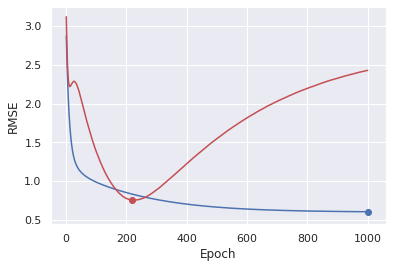

In [49]:
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.005)

rmse_train_set = dict()
rmse_test_set  = dict()


for epoch in range(1, 1001):
    sgd_reg.fit(X_train, y_train)

    y_train_predict = sgd_reg.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train_predict, y_train))
    rmse_train_set[epoch] = (rmse_train)
    
    y_test_predict = sgd_reg.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test_predict, y_test))
    rmse_test_set[epoch] = (rmse_test)


best_epoch_train, best_rmse_train = min(rmse_train_set.items(), key=lambda x: x[1]) 
best_epoch_test, best_rmse_test = min(rmse_test_set.items(), key=lambda x: x[1]) 

print('Best epoch for train set:', best_epoch_train)
print('RMSE for best epoch in train set:', best_rmse_train)
print('--------------------------------------------------')
print('Best epoch for test set:', best_epoch_test)
print('RMSE for best epoch in test set:', best_rmse_test)


plt.plot(range(1, 1001), list(rmse_train_set.values()))
plt.scatter(best_epoch_train, best_rmse_train)
plt.plot(range(1, 1001), list(rmse_test_set.values()), c='r')
plt.scatter(best_epoch_test, best_rmse_test, c='r')
plt.xlabel('Epoch')
plt.ylabel('RMSE')